In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\bless\Downloads\cust_seg.csv"
chunk_size = 10000
data = pd.DataFrame()

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    data = pd.concat([data, chunk], ignore_index=True)


In [23]:
data

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [24]:
data.shape

(1000000, 48)

In [3]:
print("Basic Dataset Information:")
print(data.info())

print("\nBasic Statistics:")
print(data.describe())

print("\nFirst 5 Rows of Dataset:")
print(data.head())


Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   fecha_dato             1000000 non-null  object 
 2   ncodpers               1000000 non-null  int64  
 3   ind_empleado           989218 non-null   object 
 4   pais_residencia        989218 non-null   object 
 5   sexo                   989214 non-null   object 
 6   age                    1000000 non-null  object 
 7   fecha_alta             989218 non-null   object 
 8   ind_nuevo              989218 non-null   float64
 9   antiguedad             1000000 non-null  object 
 10  indrel                 989218 non-null   float64
 11  ult_fec_cli_1t         1101 non-null     object 
 12  indrel_1mes            989218 non-null   float64
 13  tiprel_1mes            989218 non-null   objec

In [25]:
missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)



Missing Values in Dataset:
Unnamed: 0                    0
fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin

In [26]:
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 0


In [27]:
# Define a dictionary with old column names as keys and new descriptive names as values
column_renames = {
    'Unnamed: 0': 'Index',
    'fecha_dato': 'Date_of_Data',
    'ncodpers': 'Customer_ID',
    'ind_empleado': 'Employment_Status',
    'pais_residencia': 'Country_of_Residence',
    'sexo': 'Gender',
    'age': 'Age',
    'fecha_alta': 'Registration_Date',
    'ind_nuevo': 'New_Customer',
    'antiguedad': 'Customer_Tenure',
    'ind_hip_fin_ult1': 'Mortgage_Account',
    'ind_plan_fin_ult1': 'Financial_Plan_Account',
    'ind_pres_fin_ult1': 'Personal_Loan_Account',
    'ind_reca_fin_ult1': 'Collection_Account',
    'ind_tjcr_fin_ult1': 'Credit_Card_Account',
    'ind_valo_fin_ult1': 'Valuation_Account',
    'ind_viv_fin_ult1': 'Home_Loan_Account',
    'ind_nomina_ult1': 'Payroll_Account',
    'ind_nom_pens_ult1': 'Pension_Account',
    'ind_recibo_ult1': 'Direct_Debit_Account'
}

# Rename the columns
data.rename(columns=column_renames, inplace=True)

# Display the first few rows to verify the changes
print("\nRenamed Columns Dataset:")
print(data.head())



Renamed Columns Dataset:
   Index Date_of_Data  Customer_ID Employment_Status Country_of_Residence  \
0      0   2015-01-28      1375586                 N                   ES   
1      1   2015-01-28      1050611                 N                   ES   
2      2   2015-01-28      1050612                 N                   ES   
3      3   2015-01-28      1050613                 N                   ES   
4      4   2015-01-28      1050614                 N                   ES   

  Gender  Age Registration_Date  New_Customer Customer_Tenure  ...  \
0      H   35        2015-01-12           0.0               6  ...   
1      V   23        2012-08-10           0.0              35  ...   
2      V   23        2012-08-10           0.0              35  ...   
3      H   22        2012-08-10           0.0              35  ...   
4      V   23        2012-08-10           0.0              35  ...   

   Mortgage_Account Financial_Plan_Account  Personal_Loan_Account  \
0                 0  

In [28]:
# Map 'Employment_Status' values to meaningful labels
employment_status_map = {
    'N': 'Employed',
    'B': 'Business',
    'A': 'Retired',
    'F': 'Freelancer',
    'S': 'Student'
}

data['Employment_Status'] = data['Employment_Status'].map(employment_status_map)

# Map 'Gender' values to meaningful labels
gender_map = {
    'V': 'Male',
    'H': 'Female'
}

data['Gender'] = data['Gender'].map(gender_map)

# After mapping, let's display the value counts for these columns
print("\nUnique Values in 'Employment_Status' column after mapping:")
print(data['Employment_Status'].value_counts())

print("\nUnique Values in 'Gender' column after mapping:")
print(data['Gender'].value_counts())

# Check for 'Country_of_Residence' column again for better readability
print("\nUnique Values in 'Country_of_Residence' column:")
print(data['Country_of_Residence'].value_counts())



Unique Values in 'Employment_Status' column after mapping:
Employment_Status
Employed      988260
Business         387
Retired          287
Freelancer       282
Student            2
Name: count, dtype: int64

Unique Values in 'Gender' column after mapping:
Gender
Male      562000
Female    427214
Name: count, dtype: int64

Unique Values in 'Country_of_Residence' column:
Country_of_Residence
ES    982264
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: count, Length: 113, dtype: int64



Summary Statistics for Numerical Features:
               Index   Customer_ID   New_Customer         indrel  \
count  1000000.00000  1.000000e+06  989218.000000  989218.000000   
mean    499999.81250  6.905968e+05       0.000489       1.109074   
std     288675.28125  4.044084e+05       0.022114       3.267624   
min          0.00000  1.588900e+04       0.000000       1.000000   
25%     249999.75000  3.364110e+05       0.000000       1.000000   
50%     499999.50000  6.644760e+05       0.000000       1.000000   
75%     749999.25000  1.074511e+06       0.000000       1.000000   
max     999999.00000  1.379131e+06       1.000000      99.000000   

         indrel_1mes   tipodom       cod_prov  ind_actividad_cliente  \
count  989218.000000  989218.0  982266.000000          989218.000000   
mean        1.000085       1.0      26.852131               0.564971   
std         0.012954       0.0      12.422924               0.495761   
min         1.000000       1.0       1.000000          

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


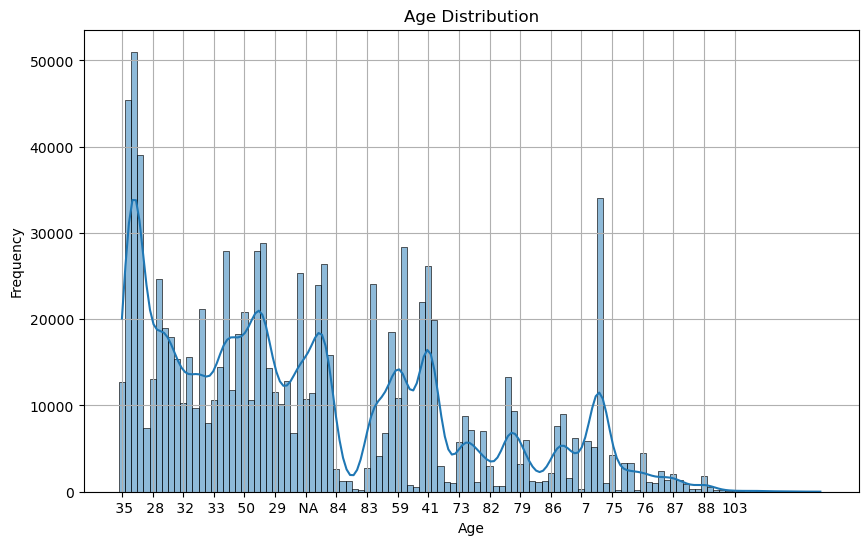

C:\Users\bless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


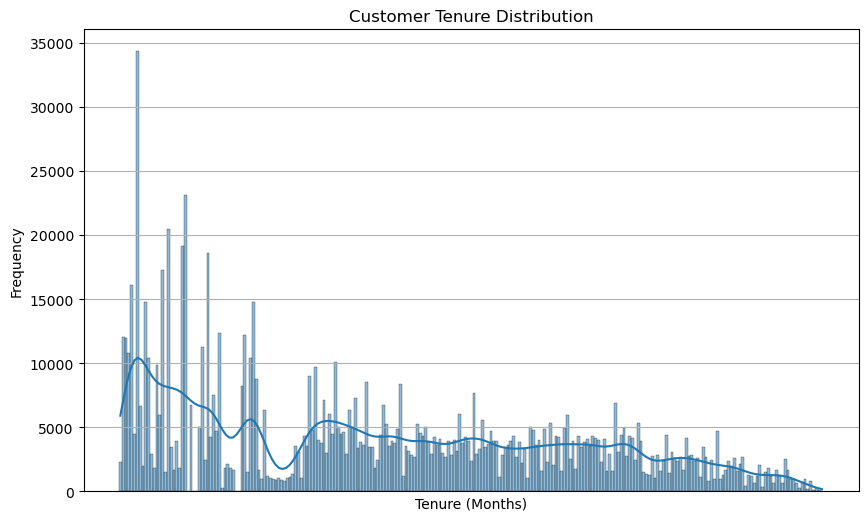

In [15]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Features:")
print(data.describe())

# Visualize the Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)  # Set the number of bins for better granularity
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Improve x-axis readability by setting appropriate ticks
plt.xticks(range(0, 101, 5))  # Show ticks every 5 years (you can adjust this based on your dataset)
plt.grid(True)  # Add gridlines for better visibility
plt.show()

# Visualize the Customer Tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Tenure'], kde=True, bins=30)  # Set the number of bins for better granularity
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')

# Improve x-axis readability by setting appropriate ticks
plt.xticks(range(0, int(data['Customer_Tenure'].max())+1, 6))  # Show ticks every 6 months (you can adjust this based on your dataset)
plt.grid(True)  # Add gridlines for better visibility
plt.show()



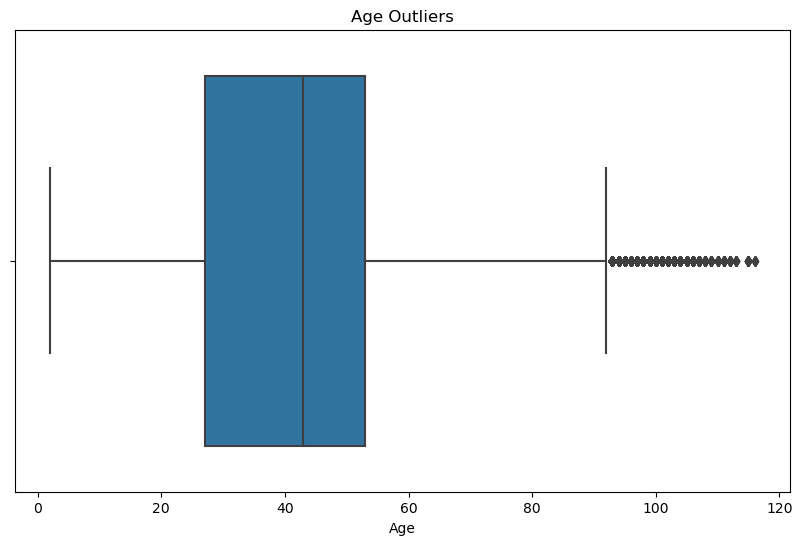

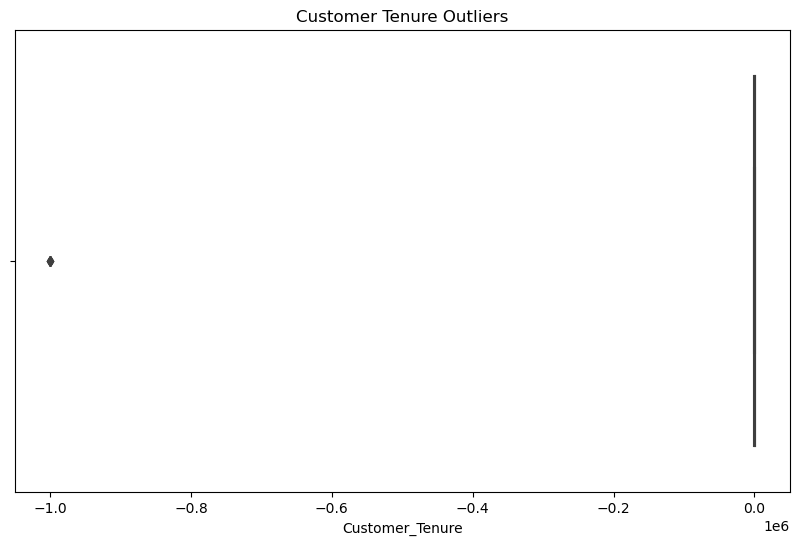

In [29]:

# Convert 'Age' and 'Customer_Tenure' to numeric, coercing errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Customer_Tenure'] = pd.to_numeric(data['Customer_Tenure'], errors='coerce')

# Handle missing values by dropping rows with NaN values (optional: you could use imputation)
data = data.dropna(subset=['Age', 'Customer_Tenure'])

# Boxplot to visualize outliers in 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age')
plt.title('Age Outliers')
plt.show()

# Boxplot to visualize outliers in 'Customer_Tenure'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Customer_Tenure')
plt.title('Customer Tenure Outliers')
plt.show()


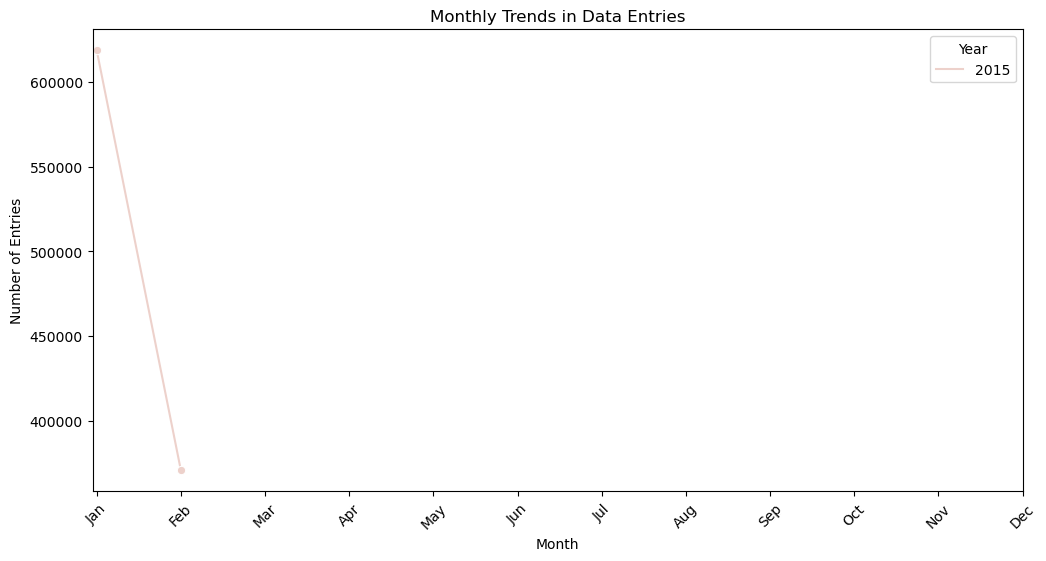

In [37]:
import warnings
from pandas.errors import SettingWithCopyWarning  # Import SettingWithCopyWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

# Assuming 'data' is your DataFrame
# Convert 'Date_of_Data' to datetime format
data.loc[:, 'Date_of_Data'] = pd.to_datetime(data['Date_of_Data'], format='%Y-%m-%d')

# Extract year and month from 'Date_of_Data'
data.loc[:, 'Year'] = data['Date_of_Data'].dt.year
data.loc[:, 'Month'] = data['Date_of_Data'].dt.month

# Group data by year and month to visualize trends
monthly_trends = data.groupby(['Year', 'Month']).size().reset_index(name='count')

# Visualize trends over time
plt.figure(figsize=(12, 6))

# Create a lineplot with month on x-axis and count on y-axis, grouping by Year
sns.lineplot(x='Month', y='count', data=monthly_trends, hue='Year', marker='o')

# Improve x-axis by formatting and adding month names
plt.title('Monthly Trends in Data Entries')
plt.xlabel('Month')
plt.ylabel('Number of Entries')

# Set the x-ticks to show month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


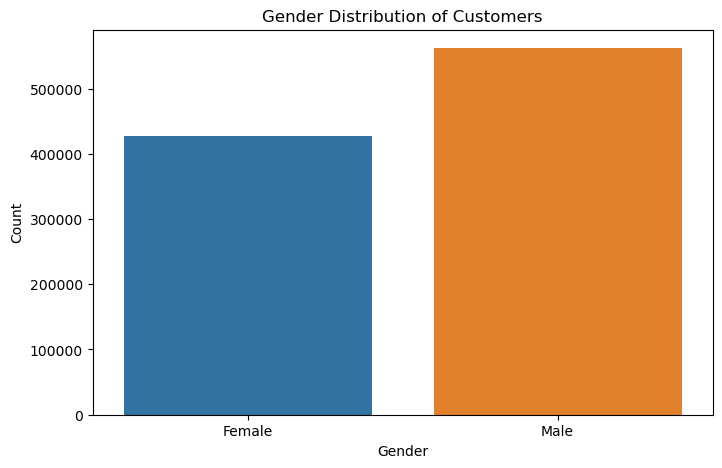

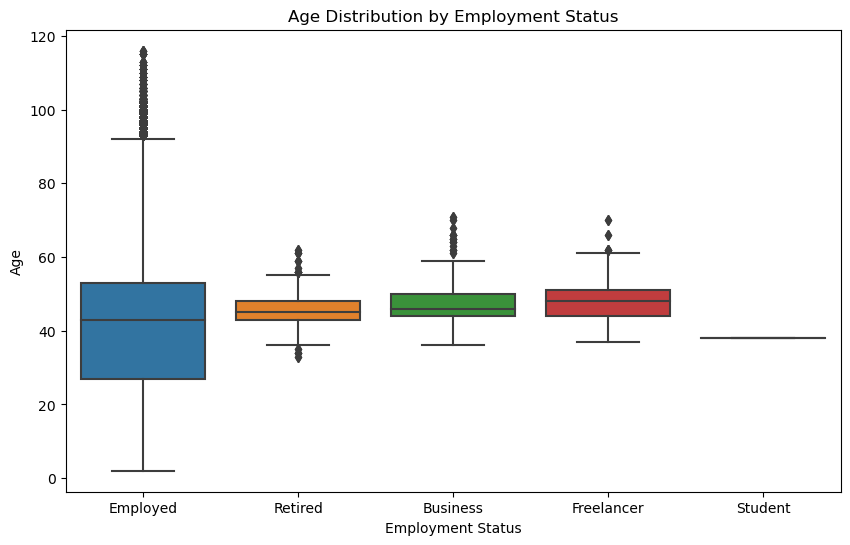

In [38]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age vs Employment Status analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Status', y='Age', data=data)
plt.title('Age Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.show()
